In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:

data_1=pd.read_csv(r"C:\Users\sivateja_k\Documents\ieee\adversial_image\output_100ms_1.csv",skiprows =1,header=None)
data_2=pd.read_csv(r"C:\Users\sivateja_k\Documents\ieee\adversial_image\output_100ms_2.csv",skiprows =1,header=None)
data_1

,0,1,2,3,4,5,6,7
0,0.100072,2111510448,NaN,instructions,1483442239,100.0,NaN,NaN
1,0.100072,3657,NaN,page-faults,1483963240,100.0,NaN,NaN
2,0.100072,69132,NaN,LLC-load-misses,1484995220,100.0,NaN,NaN
3,0.100072,1647602,NaN,dTLB-load-misses,1485750364,100.0,NaN,NaN
4,0.200366,1467249092,NaN,instructions,1077686819,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...
299,7.525199,1893,NaN,dTLB-load-misses,1034729794,100.0,NaN,NaN
300,7.607792,239517384,NaN,instructions,1022062196,100.0,NaN,NaN
301,7.607792,0,NaN,page-faults,1021651678,100.0,NaN,NaN
302,7.607792,89885,NaN,LLC-load-misses,1022062196,100.0,NaN,NaN


In [3]:
def add_param_values(param_list,val):
    if param_list ==[]:
            param_list.append(val)
    else:
        param_list.append(param_list[-1]+row_1[i])
    return param_list

data_li=[data_1,data_2]
data_dict={}
j=0
for data in data_li:
    row_1=data.iloc[:,1]
    time=data.iloc[:,0]
    time_li=[]
    instructions_li=[]
    page_faults_li=[]
    llc_load_misses_li=[]
    dtlb_load_misses_li=[]
    for i in range(0,len(row_1),4):
        instructions_li=add_param_values(instructions_li,row_1[i])
    for i in range(1,len(row_1),4):
        page_faults_li=add_param_values(page_faults_li,row_1[i])
    for i in range(2,len(row_1),4):
        llc_load_misses_li=add_param_values(llc_load_misses_li,row_1[i])
    for i in range(3,len(row_1),4):
        dtlb_load_misses_li=add_param_values(dtlb_load_misses_li,row_1[i])
    for i in range(0,len(time),4):
        time_li.append(time[i])
    data_dict[j]={"instructions":instructions_li,"page_faults":page_faults_li,
                    "llc_load_misses":llc_load_misses_li,"dtlb_load_misses":dtlb_load_misses_li, "time":time_li}
    j+=1

In [4]:
def normalize_list(list1,list2):
    if len(list1)>len(list2):
        for j in range(len(list2),len(list1)):
            list2.append(list2[-1])
    elif len(list2)>len(list1):
        for j in range(len(list1),len(list2)):
            list1.append(list1[-1])
    return list1,list2
data_dict[0]["instructions"],data_dict[1]["instructions"]= normalize_list(data_dict[0]["instructions"],data_dict[1]["instructions"])
data_dict[0]["page_faults"],data_dict[1]["page_faults"]= normalize_list(data_dict[0]["page_faults"],data_dict[1]["page_faults"])
data_dict[0]["llc_load_misses"],data_dict[1]["llc_load_misses"]= normalize_list(data_dict[0]["llc_load_misses"],data_dict[1]["llc_load_misses"])
data_dict[0]["dtlb_load_misses"],data_dict[1]["dtlb_load_misses"]= normalize_list(data_dict[0]["dtlb_load_misses"],data_dict[1]["dtlb_load_misses"])

In [5]:
data_dict

{0: {'instructions': [2111510448,
   3578759540,
   3846106996,
   4557988070,
   5079113355,
   5480548255,
   5938125276,
   6234949097,
   6880476555,
   7278730659,
   7902022990,
   8287858834,
   8738256373,
   9001273587,
   9192626415,
   9610984298,
   10194935287,
   10321741441,
   10533764409,
   10736395032,
   11333850288,
   11528106944,
   11978604196,
   14934040731,
   15081822293,
   15450183037,
   15924952746,
   16268004771,
   16369486843,
   16597291669,
   16775591139,
   17006150121,
   17781386832,
   23163664105,
   29692728069,
   36058258549,
   43060635480,
   50016037410,
   57222775697,
   64591153822,
   71952711107,
   78205581093,
   85988584675,
   92776515559,
   98995292396,
   106054960176,
   113130628548,
   120329042136,
   127629334623,
   134684563166,
   140875347760,
   148782971112,
   155427294560,
   161656576477,
   168641436420,
   175659357389,
   182956553446,
   190372041572,
   197611701635,
   203943044330,
   211578971376,
   21

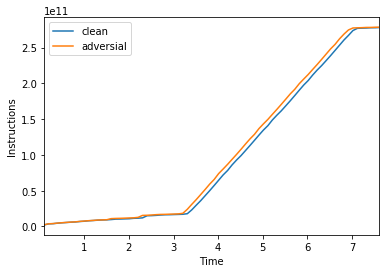

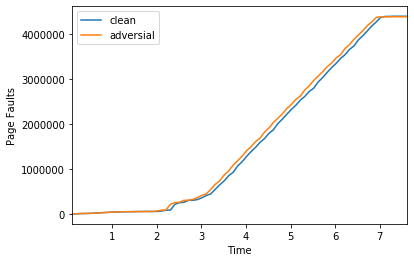

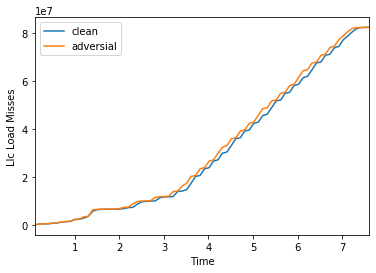

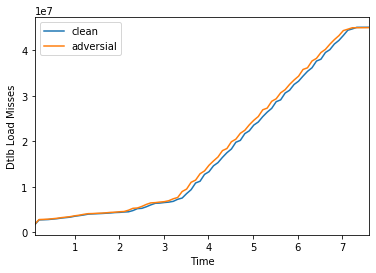

In [8]:
params_dict_keys=["instructions","page_faults","llc_load_misses","dtlb_load_misses"]
params=["Instructions","Page Faults","Llc Load Misses","Dtlb Load Misses"]
for k in range(0,4):
    df = pd.DataFrame({"clean": data_dict[0][params_dict_keys[k]],"adversial": data_dict[1][params_dict_keys[k]],
    }, index=data_dict[0]["time"])
    lines = df.plot.line()
    lines.set_xlabel("Time")
    lines.set_ylabel(params[k])
    lines.ticklabel_format(useOffset=False)
    